In [1]:
### basic
import sys
sys.path.append('../')
from config_sing import *

### specific tools
from collections import defaultdict
from functools import reduce
import itertools as it
import math
import random
import sqlite3
# https://stackoverflow.com/questions/49456158/integer-in-python-pandas-becomes-blob-binary-in-sqlite
sqlite3.register_adapter(np.int64, lambda val: int(val))
sqlite3.register_adapter(np.int32, lambda val: int(val))

### file path of fragment database
fdiry = os.path.join(FD_RES, "KS91_K562_ASTARRseq", 'database')
fname = "fragment_astarr_gata1.db"
FPATH_DB_ASTARR = os.path.join(fdiry, fname)

fdiry = os.path.join(FD_RES, "Tewhey_K562_TileMPRA", 'database')
fname = "fragment_tilempra_gata1.db"
FPATH_DB_TMPRA = os.path.join(fdiry, fname)

FPATHS_DB = [FPATH_DB_ASTARR, FPATH_DB_TMPRA]

### samples of ATAC-STARR-seq
SAMPLES = ["Output_rep1", "Output_rep2", "Output_rep3", "Output_rep4"]

You are on Duke Server: Singularity: Proj ENCODE FCC
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc



## Import fragment annotaiton

In [2]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_ASTARR_1e5.csv"
fpath = os.path.join(fdiry, fname)

dat_astarr = pd.read_csv(fpath)
dat_astarr

,Sample,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,...,Mtf_HD/1,Mtf_HIF,Mtf_ZNF306,Mtf_ZNF547,Mtf_E2F/4,Mtf_ZNF713,Mtf_MYB/1,Mtf_HINFP1/2,Mtf_ZBED1,Mtf_GMEB2/1
0,Output_rep1,chrX_47787189_47787363,chrX,47787189,47787363,47787276,0.442529,-17.644715,-17.113573,0.531142,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,Output_rep1,chrX_47788659_47788978,chrX,47788659,47788978,47788819,0.482759,-15.141870,-14.504588,0.637282,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,Output_rep1,chrX_47788659_47788979,chrX,47788659,47788979,47788819,0.484375,-15.141870,-14.504588,0.637282,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3,Output_rep1,chrX_47789145_47789363,chrX,47789145,47789363,47789254,0.614679,-13.270079,-13.019050,0.251028,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
4,Output_rep1,chrX_47789186_47789370,chrX,47789186,47789370,47789278,0.597826,-13.187144,-13.173681,0.013462,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Output_rep4,chrX_49784006_49784320,chrX,49784006,49784320,49784163,0.417197,-14.558624,-17.009170,-2.450546,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
99996,Output_rep4,chrX_49784522_49784669,chrX,49784522,49784669,49784596,0.476190,-15.204872,-16.705921,-1.501049,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
99997,Output_rep4,chrX_49785005_49785219,chrX,49785005,49785219,49785112,0.504673,-13.510785,-15.663579,-2.152793,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
99998,Output_rep4,chrX_49785112_49785242,chrX,49785112,49785242,49785177,0.523077,-13.371460,-14.711512,-1.340052,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_TileMPRA_1e5.csv"
fpath = os.path.join(fdiry, fname)

dat_tmpra = pd.read_csv(fpath)
dat_tmpra

,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,Mtf_KLF/SP/2,...,Mtf_NFAT/3,Mtf_MYB/4,Mtf_HD/1,Mtf_HIF,Mtf_ZNF306,Mtf_ZNF547,Mtf_ZNF713,Mtf_GMEB2/1,Mtf_HINFP1/2,Mtf_ZBED1
0,chrX_47786401_47786600,chrX,47786401,47786600,47786501,0.331658,2117.786841,10474.868703,2.305939,6.70010,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chrX_47786401_47786600,chrX,47786401,47786600,47786501,0.331658,2117.786841,10474.868703,2.305939,6.70010,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chrX_47786401_47786600,chrX,47786401,47786600,47786501,0.331658,2117.786841,10474.868703,2.305939,6.70010,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chrX_47786401_47786600,chrX,47786401,47786600,47786501,0.331658,2117.786841,10474.868703,2.305939,6.70010,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chrX_47786451_47786650,chrX,47786451,47786650,47786551,0.341709,1386.007392,2387.118966,0.783056,0.00000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,chrX_49786101_49786300,chrX,49786101,49786300,49786201,0.351759,777.498485,1556.276476,1.000447,0.00000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,chrX_49786101_49786300,chrX,49786101,49786300,49786201,0.351759,777.498485,1556.276476,1.000447,0.00000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,chrX_49786201_49786400,chrX,49786201,49786400,49786301,0.462312,811.928202,667.113550,-0.284697,12.49458,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,chrX_49786351_49786550,chrX,49786351,49786550,49786451,0.512563,775.951388,668.187036,-0.216439,11.58850,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Get matrix

In [4]:
dat = dat_astarr
lst = [col for col in dat.columns if col.startswith('Mtf')]
df1 = dat[lst]
df1.head()

,Mtf_ZNF146,Mtf_NR/15,Mtf_NR/20,Mtf_FOX/4,Mtf_TBX/1,Mtf_ZIC,Mtf_TBX/4,Mtf_PRDM4,Mtf_FOX/8,Mtf_EGR,...,Mtf_HD/1,Mtf_HIF,Mtf_ZNF306,Mtf_ZNF547,Mtf_E2F/4,Mtf_ZNF713,Mtf_MYB/1,Mtf_HINFP1/2,Mtf_ZBED1,Mtf_GMEB2/1
0,1.8019,8.0507,8.1423,8.8403,11.3184,6.6872,7.42815,1.6998,4.7093,7.5010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.0000,0.0000,8.9172,0.0000,9.3209,8.36340,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0000,0.0000,8.9172,0.0000,9.3209,8.36340,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,3.8142,0.0000,12.5525,15.9419,0.0000,0.00000,0.0000,0.0000,8.7932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,3.8142,0.0000,12.5525,15.9419,0.0000,7.85670,0.0000,0.0000,8.7932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dat = dat_tmpra
lst = [col for col in dat.columns if col.startswith('Mtf')]
df2 = dat[lst]
df2.head()

,Mtf_KLF/SP/2,Mtf_ZNF28,Mtf_FOX/4,Mtf_ZNF382,Mtf_ZNF136,Mtf_ZNF41,Mtf_IRF/1,Mtf_RUNX/2,Mtf_ZNF320,Mtf_HD/20,...,Mtf_NFAT/3,Mtf_MYB/4,Mtf_HD/1,Mtf_HIF,Mtf_ZNF306,Mtf_ZNF547,Mtf_ZNF713,Mtf_GMEB2/1,Mtf_HINFP1/2,Mtf_ZBED1
0,6.7001,15.9435,8.4743,24.6662,2.6078,7.1286,5.3024,8.9312,5.6607,7.8543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.7001,15.9435,8.4743,24.6662,2.6078,7.1286,5.3024,8.9312,5.6607,7.8543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.7001,15.9435,8.4743,24.6662,2.6078,7.1286,5.3024,8.9312,5.6607,7.8543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.7001,15.9435,8.4743,24.6662,2.6078,7.1286,5.3024,8.9312,5.6607,7.8543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,7.6938,0.0000,24.6662,2.6078,7.1286,5.3024,8.9312,5.6607,7.8543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
lst = df1.apply(lambda x: np.mean(x > 0), axis=0)
idx = lst > 0.1
df1 = df1.loc[:,idx]
df1.shape

(100000, 142)

In [29]:
lst = df2.apply(lambda x: np.mean(x > 0), axis=0)
idx = lst > 0.1
df2 = df2.loc[:,idx]
df2.shape

(100000, 137)

In [32]:
dat = pd.concat([df1, df2])
dat = dat.dropna(axis=1)
print(dat.shape)
dat.head()

(200000, 136)


,Mtf_NR/15,Mtf_FOX/4,Mtf_ZIC,Mtf_TBX/4,Mtf_EGR,Mtf_NR/12,Mtf_NR/7,Mtf_NR/19,Mtf_NR/17,Mtf_NR/16,...,Mtf_MZF1,Mtf_RFX/3,Mtf_P53-like/1,Mtf_MFZ1,Mtf_AHR,Mtf_MBD2,Mtf_KAISO,Mtf_MECP2,Mtf_ZNF547,Mtf_E2F/4
0,8.0507,8.8403,6.6872,7.42815,7.5010,8.553,7.1505,7.9804,9.04630,7.4082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,8.9172,9.3209,8.36340,0.0000,0.000,6.7141,0.0000,0.00000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,8.9172,9.3209,8.36340,0.0000,0.000,6.7141,0.0000,0.00000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.8142,12.5525,0.0000,0.00000,8.7932,0.000,0.0000,0.0000,7.80645,8.9591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8142,12.5525,0.0000,7.85670,8.7932,0.000,0.0000,0.0000,0.00000,8.9591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X1 = df1.to_numpy()
X2 = df2.to_numpy()
X  = dat.to_numpy()

print(X1.shape)
print(X2.shape)
print(X.shape)

(100000, 142)
(100000, 137)
(200000, 136)


## Dimensional reduction

In [34]:
import umap
from sklearn.manifold import TSNE

In [37]:
%%time
ump   = umap.UMAP()
X1_ump = ump.fit_transform(X1)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [35]:
%%time
ump   = umap.UMAP()
X_ump = ump.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [38]:
%%time
tsne  = TSNE(n_components=2, init='pca')
X1_tsn = tsne.fit_transform(X1)

CPU times: user 24min 13s, sys: 58.3 s, total: 25min 11s
Wall time: 14min 53s


In [39]:
%%time
tsne  = TSNE(n_components=2, init='pca')
X2_tsn = tsne.fit_transform(X2)

CPU times: user 17min 6s, sys: 51.4 s, total: 17min 58s
Wall time: 10min 53s


In [40]:
%%time
tsne  = TSNE(n_components=2, init='pca')
X_tsn = tsne.fit_transform(X)

CPU times: user 57min 9s, sys: 2min 55s, total: 1h 5s
Wall time: 36min 23s


In [41]:
print(X1_tsn.shape)
print(X2_tsn.shape)
print(X_tsn.shape)

(100000, 2)
(100000, 2)
(200000, 2)


Text(0.5, 1.0, 'ATAC-STARR Output')

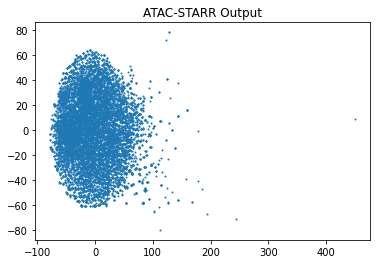

In [50]:
np.random.seed(123)

n      = 10000
n_rows = X1_tsn.shape[0]
idx    = np.arange(n_rows)
i      = np.random.choice(idx, size=n)

fig, ax = plt.subplots()
x = X1_tsn[i,0]
y = X1_tsn[i,1]
ax.scatter(x, y, s=1)
ax.set_title("ATAC-STARR Output")

Text(0.5, 1.0, 'Tiling MPRA Output')

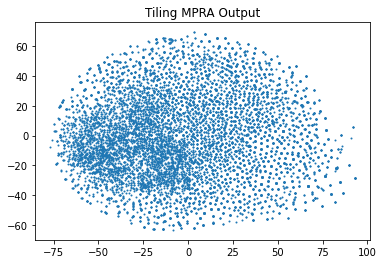

In [51]:
np.random.seed(123)

n      = 10000
n_rows = X2_tsn.shape[0]
idx    = np.arange(n_rows)
i      = np.random.choice(idx, size=n)

fig, ax = plt.subplots()
x = X2_tsn[i,0]
y = X2_tsn[i,1]
ax.scatter(x, y, s=1)
ax.set_title("Tiling MPRA Output")

Text(0.5, 1.0, 'ATAC-STARR & Tiling MPRA Output')

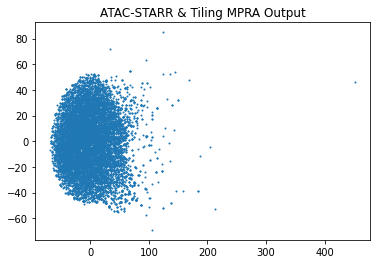

In [53]:
np.random.seed(123)

n      = 10000
n_rows = X_tsn.shape[0]
idx    = np.arange(n_rows)
i      = np.random.choice(idx, size=n)

fig, ax = plt.subplots()
x = X_tsn[i,0]
y = X_tsn[i,1]
ax.scatter(x, y, s=1)
ax.set_title("ATAC-STARR & Tiling MPRA Output")

In [58]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

1


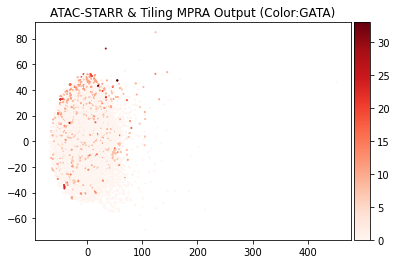

In [61]:
np.random.seed(123)

n      = 10000
n_rows = X_tsn.shape[0]
idx    = np.arange(n_rows)
i      = np.random.choice(idx, size=n)

j = dat.columns.str.startswith("Mtf_GATA")
c = dat.iloc[i,j].values.ravel()
print(np.sum(j))

fig, ax = plt.subplots()
x = X_tsn[i,0]
y = X_tsn[i,1]
im = ax.scatter(x, y, s=1, c=c, cmap="Reds")
ax.set_title("ATAC-STARR & Tiling MPRA Output (Color:GATA)")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(im, cax=cax)

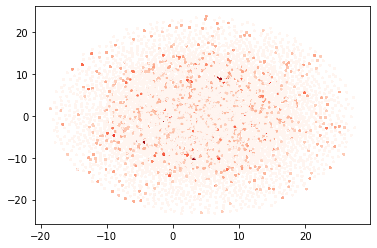

In [43]:
fig, ax = plt.subplots()
x = X_tsn[:,0]
y = X_tsn[:,1]
ax.scatter(x, y, s=1, c=c, cmap="Reds")